## Getting Data 

In [27]:
import quandl
data2 = quandl.get("EOD/HD", authtoken="dusYQoyrxzBKnR4esBk9")

In [30]:
data2.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2013-09-03,74.83,75.25,73.68,73.90,7802800.0,0.39,1.0,65.913791,66.283747,64.900817,65.094603,7802800.0
2013-09-04,73.98,74.51,73.74,74.14,8271600.0,0.00,1.0,65.165071,65.631920,64.953668,65.306007,8271600.0
2013-09-05,74.07,74.21,72.84,72.99,11039000.0,0.00,1.0,65.244347,65.367666,64.160905,64.293032,11039000.0
2013-09-06,73.55,73.56,72.21,72.70,9968400.0,0.00,1.0,64.786307,64.795115,63.605972,64.037587,9968400.0
2013-09-09,72.98,73.79,72.90,73.58,5781800.0,0.00,1.0,64.284224,64.997710,64.213756,64.812732,5781800.0


In [31]:
data2.describe()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
count,1090.000000,1090.000000,1090.000000,1090.000000,1.090000e+03,1090.000000,1090.0,1090.000000,1090.000000,1090.000000,1090.000000,1.090000e+03
mean,118.182440,119.028397,117.356472,118.226147,5.415875e+06,0.010404,1.0,109.371583,110.152952,108.609058,109.412348,5.415875e+06
std,28.181856,28.315220,28.065248,28.208633,2.274563e+06,0.083182,0.0,28.761464,28.900528,28.638959,28.787569,2.274563e+06
min,72.980000,73.560000,72.210000,72.700000,1.517075e+06,0.000000,1.0,64.284224,64.795115,63.605972,64.037587,1.517075e+06
25%,92.310000,93.000000,91.362575,92.127500,3.895442e+06,0.000000,1.0,83.056038,83.712514,82.238611,82.856554,3.895442e+06
50%,120.910000,121.885000,119.690000,120.690000,4.927485e+06,0.000000,1.0,111.522670,112.329684,110.278486,111.601966,4.927485e+06
75%,135.725000,136.495000,134.810000,135.737500,6.349263e+06,0.000000,1.0,127.115128,127.908726,126.454243,127.241542,6.349263e+06
max,190.910000,191.490000,190.010000,190.360000,2.075320e+07,0.890000,1.0,184.068443,184.627658,183.200696,183.538153,2.075320e+07


## Imports 

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVR

## Windowing with size = 30

In [33]:
df = pd.DataFrame(data2['Adj_Close'])

In [35]:
df['Predictions'] = df['Adj_Close'].shift(-30)

In [36]:
x = df['Adj_Close']

In [37]:
x = x[:-30]

In [38]:
y = np.array(df['Predictions'])

In [39]:
y = y[:-30]

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [41]:
svr_rbf = SVR(kernel = 'rbf', gamma = 0.1)

In [42]:
x_train = np.array(x_train).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
x_test = np.array(x_test).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

In [43]:
svr_rbf.fit(x_train, y_train)

/home/shreyashrawat/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [44]:
pred = svr_rbf.predict(x_test)

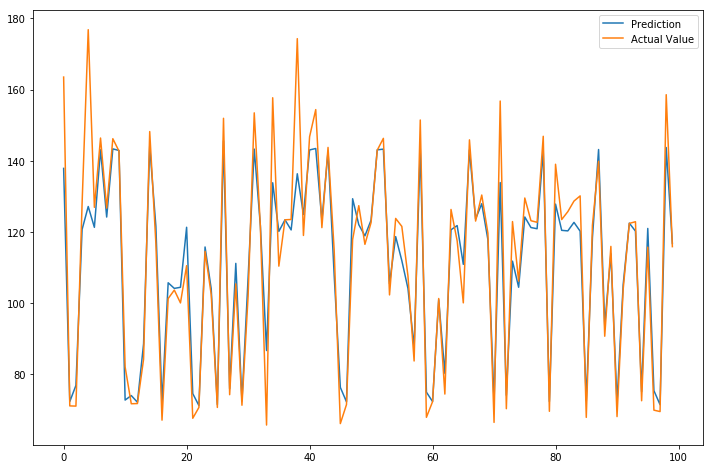

In [48]:
fig = plt.figure(figsize = (12,8))
plt.plot(pred[:100], label = 'Prediction')
plt.plot(y_test[:100], label = 'Actual Value')
plt.legend()